# Procesamiento

In [1]:
import kdsource.histograms as kdh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openmc
import os
import glob
import kdsource.surfsource as kds


In [2]:

hs = kdh.HistogramSource(
    trackfile="/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/trackfile_0.h5",
    particle_type="neutron",
    z0=30,
    Nparticles=5e6,
    surface_geometry='rectangular',
    # surface_geometry='circular',
    # R=5,
    domain={"w": [0, 2]},
)
hs.configure_binning(
    variable_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[120] * 5,
    macro_bins=[9, 8, 6, 5],
    micro_binning="adaptive",
    macro_binning="adaptive",
)
hs.build_tree()
hs.write_xml(output="source.xml")

# user_defined_edges = [
#     [2.995732273553991 + 1e-9],
#     # None,
#     [-1.5, 1.5],
#     [-1.5, 1.5],
#     [1 - 1e-9],
#     None,
# ]

hs.generate_mcpl(
    n_particles=5e6,
    write_path="mcpl_test.mcpl",
    overwrite=True,
)

[DEBUG] Creando SurfaceSourceFile con domain={'w': [0, 2], 'type': [2112, None]}


Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/trackfile_0.h5: 2677552
100% n, 0% g, 0% e-, 0% e+, 0% p, 


[DEBUG] Σwgt=2.087e+05 | N=5000000 | J=4.174e-02
[DEBUG] Binning configurado → {'order': ['ln(E0/E)', 'x', 'y', 'mu', 'phi'], 'micro': [120, 120, 120, 120, 120], 'macro': [9, 8, 6, 5], 'micro_binning': 'adaptive', 'macro_binning': 'adaptive', 'user': [None, None, None, None, None]}
[DEBUG] Árbol construido con éxito. Root=TreeNode(n_children=9)
[INFO] XML guardado → source.xml
[INFO] Ejecutando: kdtool resample -o /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl -n 5000000 -m 2 /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/source.xml


KDSource resample tool
flag1
Resampling from histograms...
Header loaded successfully
Variables = 5 | z0 = 30.000 cm | J = 4.174e-02 1/s
 | Geometry = rectangular
Particula 100000
Particula 200000
Particula 300000
Particula 400000
Particula 500000
Particula 600000
Particula 700000
Particula 800000
Particula 900000
Particula 1000000
Particula 1100000
Particula 1200000
Particula 1300000
Particula 1400000
Particula 1500000
Particula 1600000
Particula 1700000
Particula 1800000
Particula 1900000
Particula 2000000
Particula 2100000
Particula 2200000
Particula 2300000
Particula 2400000
Particula 2500000
Particula 2600000
Particula 2700000
Particula 2800000
Particula 2900000
Particula 3000000
Particula 3100000
Particula 3200000
Particula 3300000
Particula 3400000
Particula 3500000
Particula 3600000
Particula 3700000
Particula 3800000
Particula 3900000
Particula 4000000
Particula 4100000
Particula 4200000
Particula 4300000
Particula 4400000
Particula 4500000
Particula 4600000
Particula 4700000


[INFO] MCPL generado → /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl


MCPL: Succesfully compressed file into mcpl_test.mcpl.gz
Successfully sampled 5000000 particles.


PosixPath('/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl')

# Comparacion del resampleo offline con el surftrack original

Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl.gz: 5000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/trackfile_0.h5: 2677552
100% n, 0% g, 0% e-, 0% e+, 0% p, 


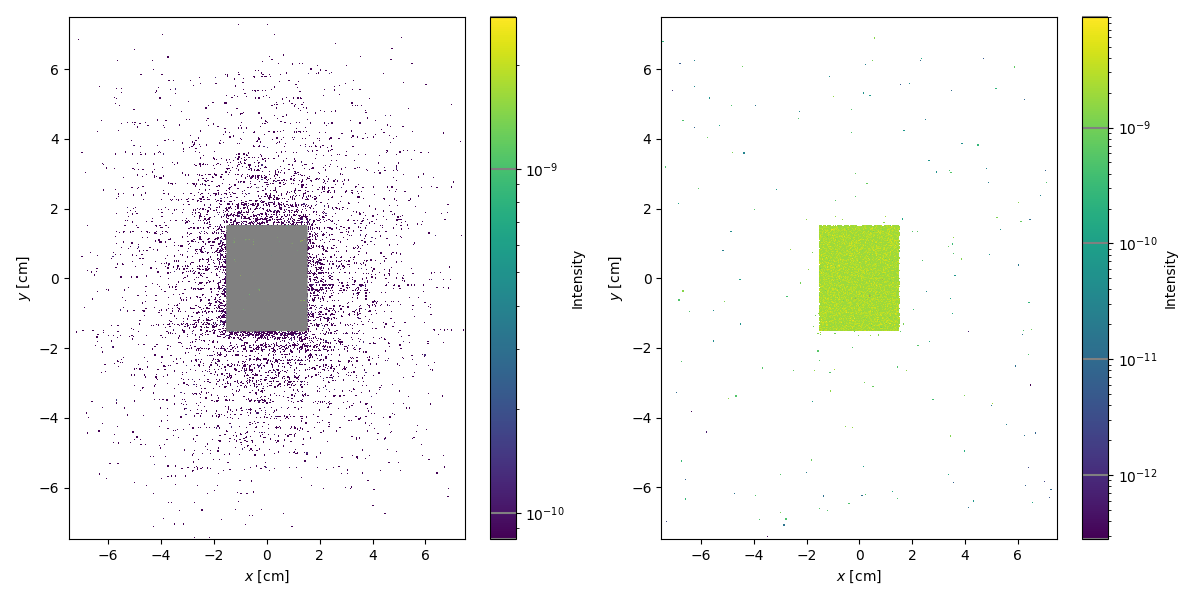

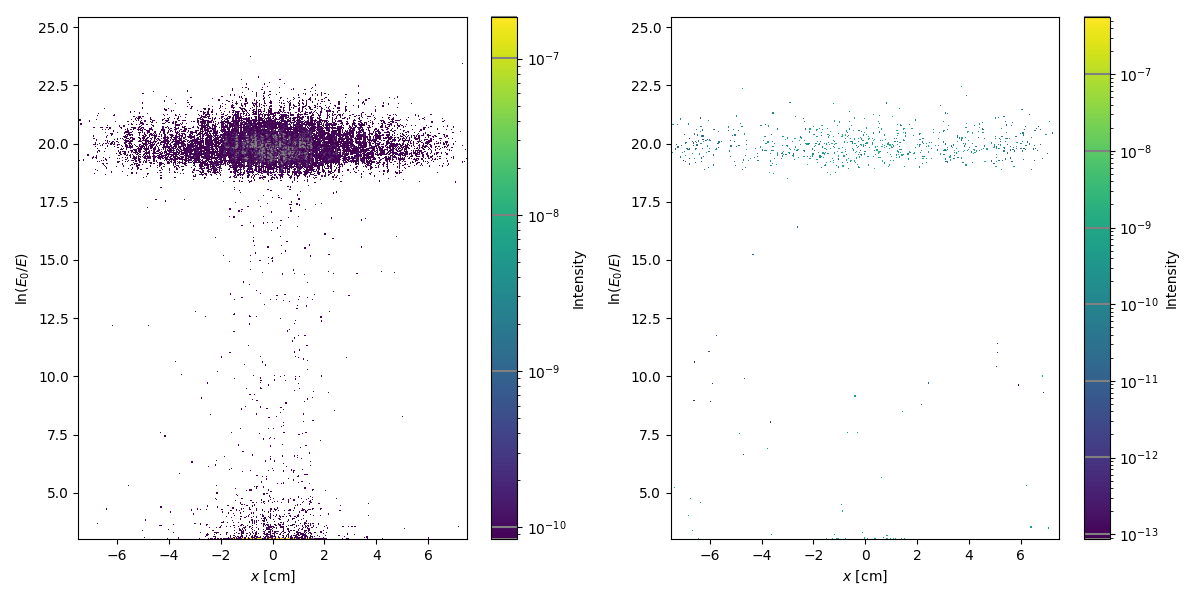

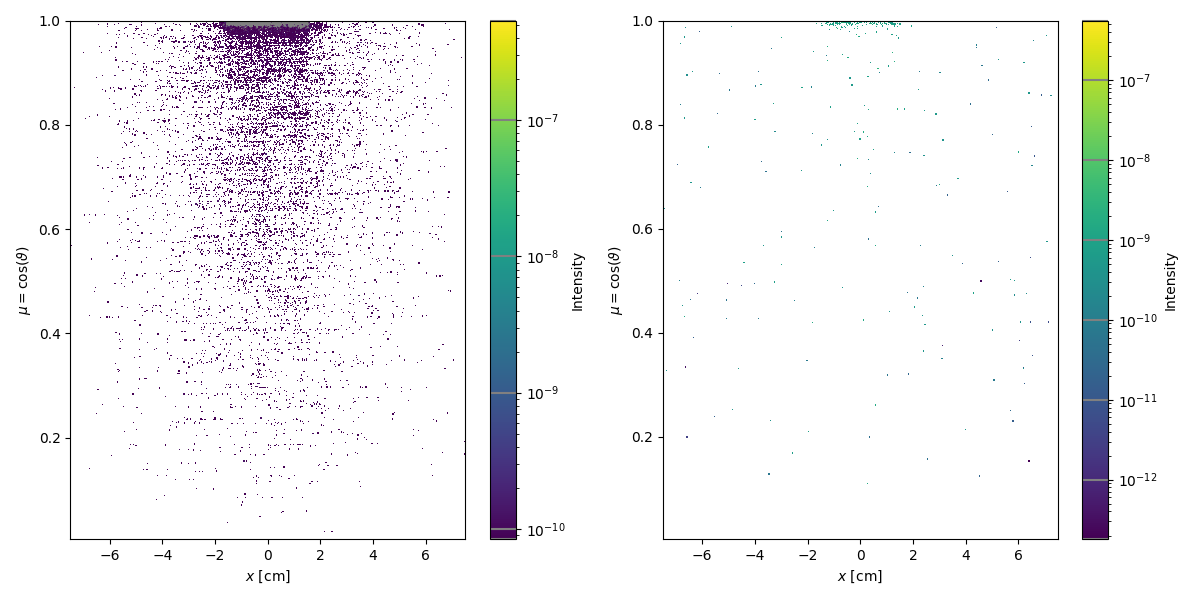

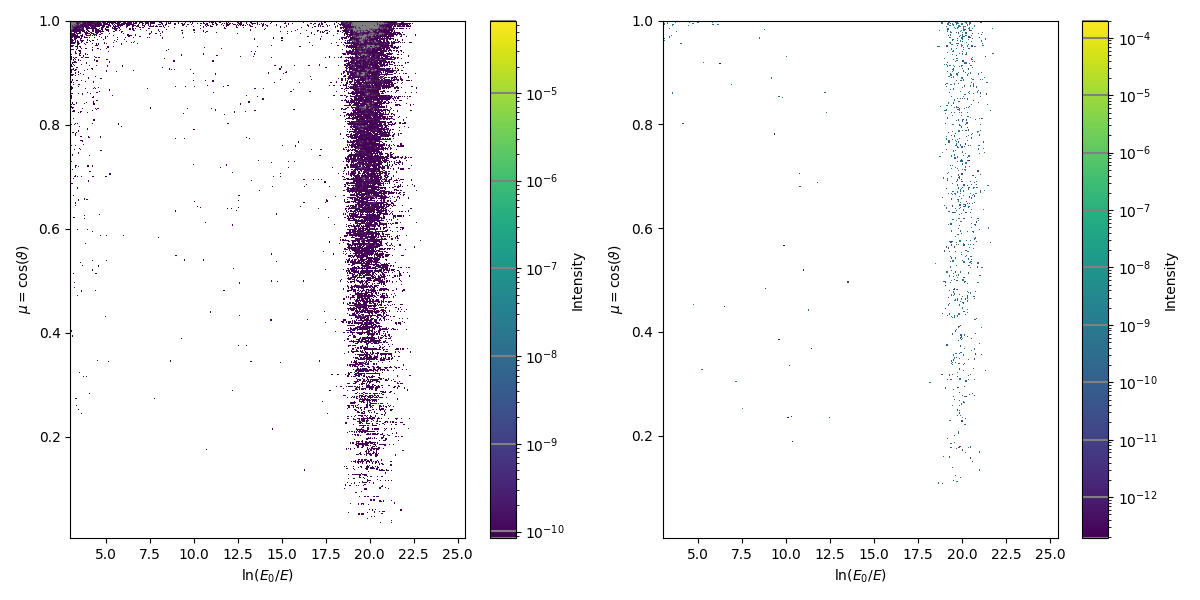

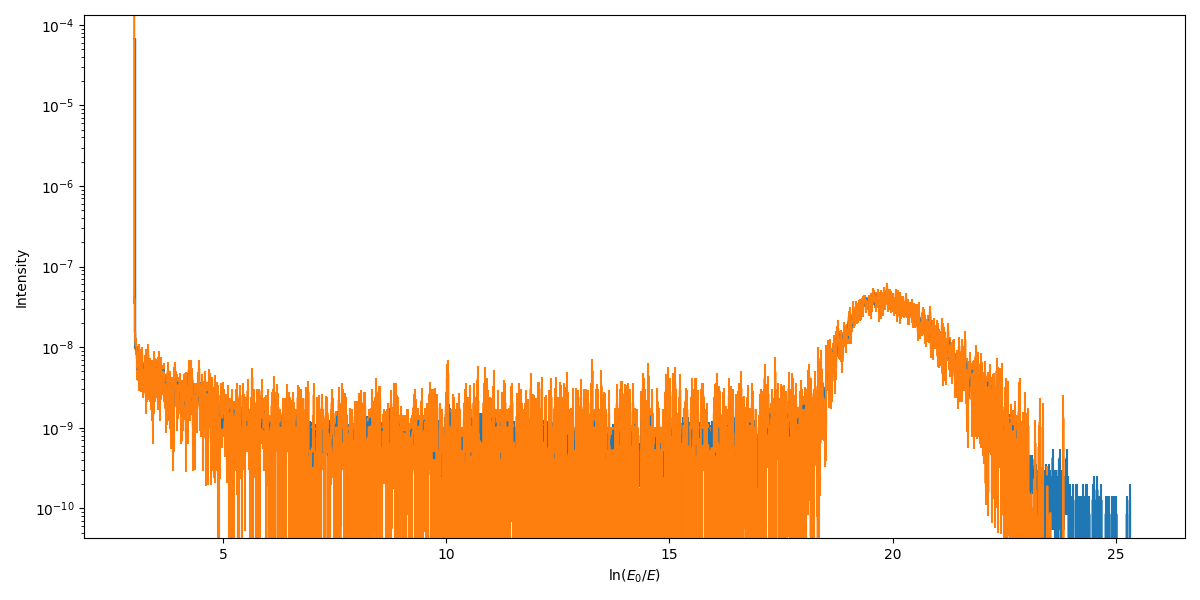

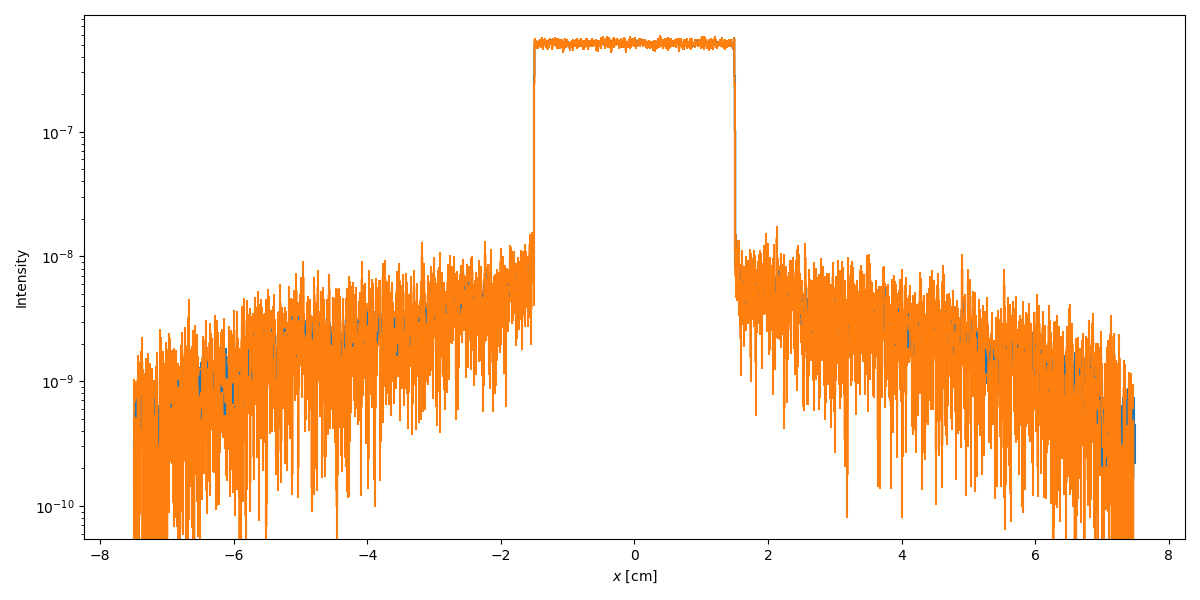

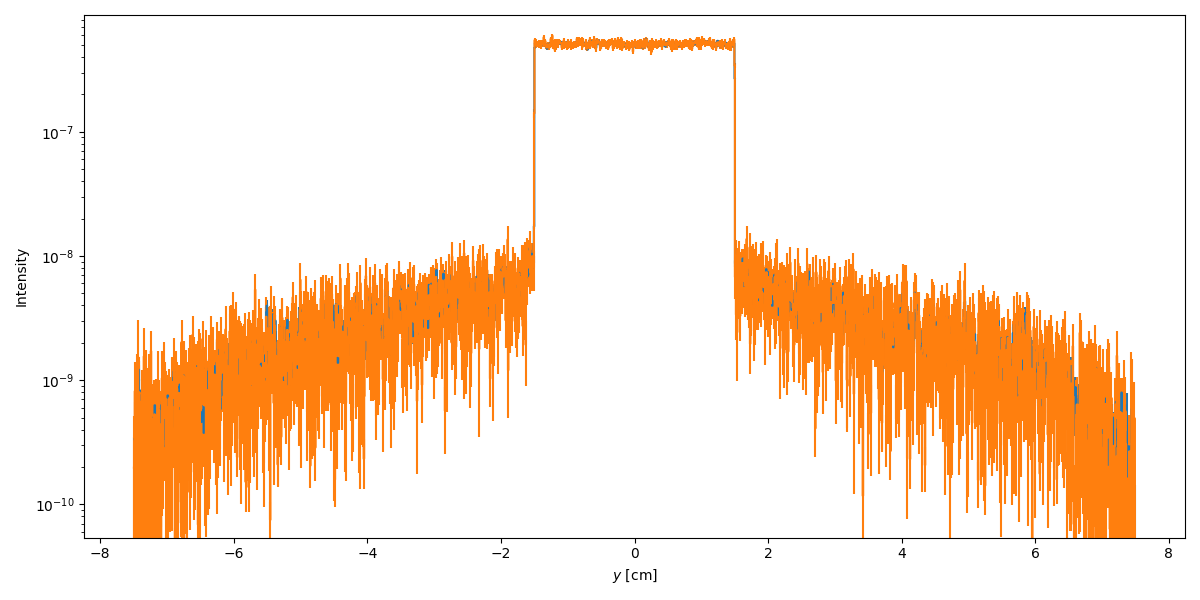

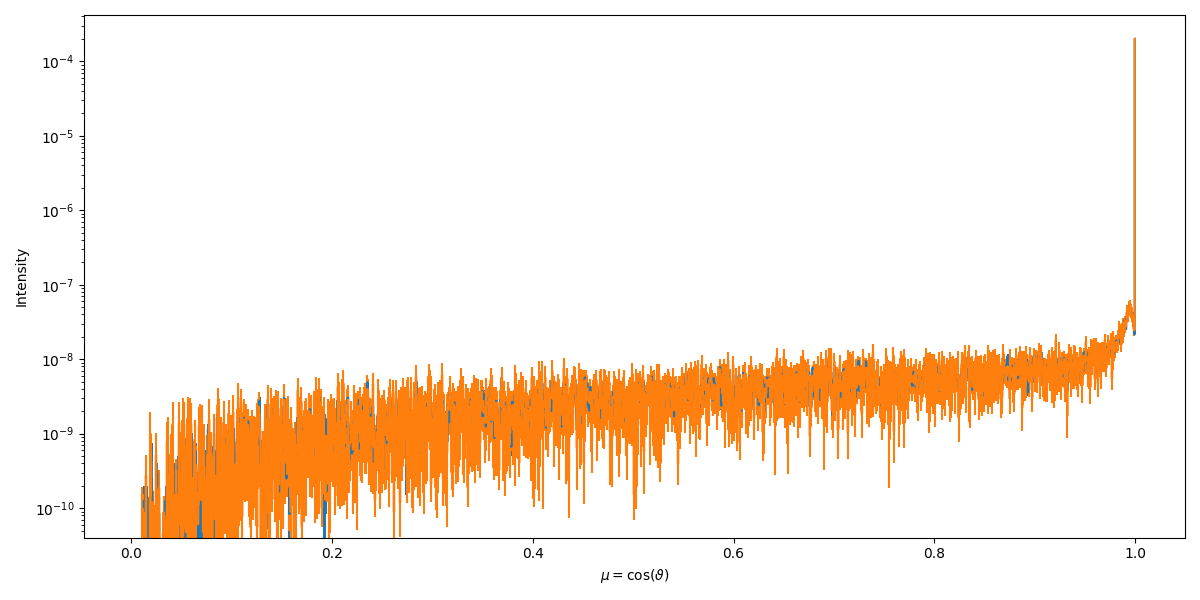

In [9]:
ss = kds.SurfaceSourceFile(
    '/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl.gz',
)
bins = 2000
factor = 1/23.92

ss_original = kds.SurfaceSourceFile(
    '/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/trackfile_0.h5',
    domain={"w": [0, 2]},
)
def plot_2d(
    ss: kds.SurfaceSourceFile,
    ss_original: kds.SurfaceSourceFile,
    bins: int,
    vars=["x", "y"],
    scales=["linear", "linear"],
    zscale="log",    
    factor=1,
):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # first subplot: ss
    plt.sca(axes[0])
    ss.plot_distribution(
        vars=vars,
        bins=[bins, bins],
        scales=scales,
        zscale=zscale,
        factor=factor,
    )

    # second subplot: ss_original
    plt.sca(axes[1])
    ss_original.plot_distribution(
        vars=vars,
        bins=[bins, bins],
        scales=scales,
        zscale=zscale,
    )

    plt.tight_layout()
    plt.show()

def plot_1d(
    ss: kds.SurfaceSourceFile,
    ss_original: kds.SurfaceSourceFile,
    bins: int,
    vars=["x"],
    scales=["linear", "log"],
    factor=1,
):
    # fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    plt.figure(figsize=(12, 6))

    # first subplot: ss
    # plt.sca(axes[0])
    ss.plot_distribution(
        vars=vars,
        bins=[bins],
        scales=scales,
        factor=factor,
    )

    # second subplot: ss_original
    # plt.sca(axes[1])
    ss_original.plot_distribution(
        vars=vars,
        bins=[bins],
        scales=scales,
    )

    plt.tight_layout()
    plt.show()

%matplotlib widget

plot_2d(
    ss,
    ss_original,
    bins=bins,
    vars=["x", "y"],
    scales=["linear", "linear"],
    zscale="log",
    factor=factor,
)

plot_2d(
    ss,
    ss_original,
    bins=bins,
    vars=["x", "ln(E0/E)"],
    scales=["linear", "linear"],
    zscale="log",
    factor=factor,
)

plot_2d(
    ss,
    ss_original,
    bins=bins,
    vars=["x", "mu"],
    scales=["linear", "linear"],
    zscale="log",
    factor=factor,
)

plot_2d(
    ss,
    ss_original,
    bins=bins,
    vars=["ln(E0/E)", "mu"],
    scales=["linear", "linear"],
    zscale="log",
    factor=factor,
)

plot_1d(
    ss,
    ss_original,
    bins=bins,
    vars=["ln(E0/E)"],
    scales=["linear", "log"],
    factor=factor,
)

plot_1d(
    ss,
    ss_original,
    bins=bins,
    vars=["x"],
    scales=["linear", "log"],
    factor=factor,
)

plot_1d(
    ss,
    ss_original,
    bins=bins,
    vars=["y"],
    scales=["linear", "log"],
    factor=factor,
)

plot_1d(
    ss,
    ss_original,
    bins=bins,
    vars=["mu"],
    scales=["linear", "log"],
    factor=factor,
)


# plt.figure()
# ss.plot_distribution(
#     vars=["phi"],
#     bins=[201],
#     scales=["linear","log"],
# )
# plt.show()

# Corrida en OpenMC onthefly

In [4]:
# ---------------------------------------------------------------------------------------------------------------------------------------
# Configuración de secciones eficaces
# ---------------------------------------------------------------------------------------------------------------------------------------
openmc.config["cross_sections"] = (
    "/home/lucas/Documents/Proyecto_Integrador/endfb-viii.0-hdf5/cross_sections.xml"
)

# ----------------------------------------------------------------------------------------------------------------------------------------
# Procesamiento de la fuente
# ----------------------------------------------------------------------------------------------------------------------------------------
source = openmc.HistogramSource(path = "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/source.xml")

# ---------------------------------------------------------------------------------------------------------------------------------------
# Procesamiento de la geometría
# ---------------------------------------------------------------------------------------------------------------------------------------
# Parámetros geométricos
z0=30
L_x, L_y, L_z = 15,15,z0+10.025

# Definir superficies externas
surfaces = {
    "x_min": openmc.XPlane(x0=-L_x / 2, boundary_type="vacuum"),
    "x_max": openmc.XPlane(x0=L_x / 2, boundary_type="vacuum"),
    "y_min": openmc.YPlane(y0=-L_y / 2, boundary_type="vacuum"),
    "y_max": openmc.YPlane(y0=L_y / 2, boundary_type="vacuum"),
    "z_min": openmc.ZPlane(z0=z0, boundary_type="vacuum"),
    "z_max": openmc.ZPlane(z0=L_z, boundary_type="vacuum"),
}

# Se agrega la superficie de registro para generar el track file
surfaces.update(
    {
        "z_track": openmc.ZPlane(
            z0=L_z-10, boundary_type="transmission", surface_id=70
        )
    }
)

# Para fuente tipo FileSource se traduce la superficie inferior para posicionar z0.
# Sino se hace entonces las particulas aparecer fuera de la geometria.
surfaces["z_min"].translate(vector=(0, 0, -1e-6), inplace=True)

# Definir regiones
region_externa = (
    +surfaces["x_min"]
    & -surfaces["x_max"]
    & +surfaces["y_min"]
    & -surfaces["y_max"]
    & +surfaces["z_min"]
    & -surfaces["z_max"]
)

# Crear universo y definir celdas según configuración de fuente y vacío
universe = openmc.Universe()

universe.add_cell(
    openmc.Cell(
        region=region_externa & -surfaces["z_track"],
        fill=None,
        name="region1",
    )
)
universe.add_cell(
    openmc.Cell(
        region=region_externa & +surfaces["z_track"],
        fill=None,
        name="region2",
    )
)

geom = openmc.Geometry(universe)
geom.export_to_xml()

# ---------------------------------------------------------------------------------------------------------------------------------------
# Configuración de settings
# ---------------------------------------------------------------------------------------------------------------------------------------
settings = openmc.Settings()
settings.surf_source_write = {"surface_ids": [70], "max_particles": 20000000}
settings.run_mode = "fixed source"
settings.batches = 100
settings.particles = int(5e4)
settings.source = source
settings.export_to_xml()

# ---------------------------------------------------------------------------------------------------------------------------------------
# Limpieza de archivos previos y ejecución de la simulación
# ---------------------------------------------------------------------------------------------------------------------------------------
for file in glob.glob("statepoint.*.h5"):
    os.remove(file)
if os.path.exists("summary.h5"):
    os.remove("summary.h5")

openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [5]:
vector_x = np.linspace(-7.5, 7.5, 200)
vector_y = np.linspace(-7.5, 7.5, 200)
vector_u = np.linspace(0, 30, 200)
vector_phi = np.linspace(-4, 4, 200)
vector_mu = np.linspace(0, 1, 200)

# ---------------------------------------------------------------------------------------------------------------------------------------

df_original = kds.SurfaceSourceFile("/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl.gz").get_pandas_dataframe()
valores_x = df_original["x"].to_numpy()
valores_y = df_original["y"].to_numpy()
valores_u = df_original["ln(E0/E)"].to_numpy()
valores_phi = df_original["phi"].to_numpy()
valores_mu = df_original["mu"].to_numpy()
del df_original

hist_x_original = np.histogram(valores_x, bins=vector_x)[0]
hist_y_original = np.histogram(valores_y, bins=vector_y)[0]
hist_u_original = np.histogram(valores_u, bins=vector_u)[0]
hist_phi_original = np.histogram(valores_phi, bins=vector_phi)[0]
hist_mu_original = np.histogram(valores_mu, bins=vector_mu)[0]
del valores_x, valores_y, valores_u, valores_phi, valores_mu

# ---------------------------------------------------------------------------------------------------------------------------------------

df_registrado = kds.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/surface_source.h5"
).get_pandas_dataframe()
valores_x = df_registrado["x"].to_numpy()
valores_y = df_registrado["y"].to_numpy()
valores_u = df_registrado["ln(E0/E)"].to_numpy()
valores_phi = df_registrado["phi"].to_numpy()
valores_mu = df_registrado["mu"].to_numpy()
del df_registrado

hist_x_registrado = np.histogram(valores_x, bins=vector_x)[0]
hist_y_registrado = np.histogram(valores_y, bins=vector_y)[0]
hist_u_registrado = np.histogram(valores_u, bins=vector_u)[0]
hist_phi_registrado = np.histogram(valores_phi, bins=vector_phi)[0]
hist_mu_registrado = np.histogram(valores_mu, bins=vector_mu)[0]
del valores_x, valores_y, valores_u, valores_phi, valores_mu

Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl.gz: 5000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/surface_source.h5: 4999955
100% n, 0% g, 0% e-, 0% e+, 0% p, 


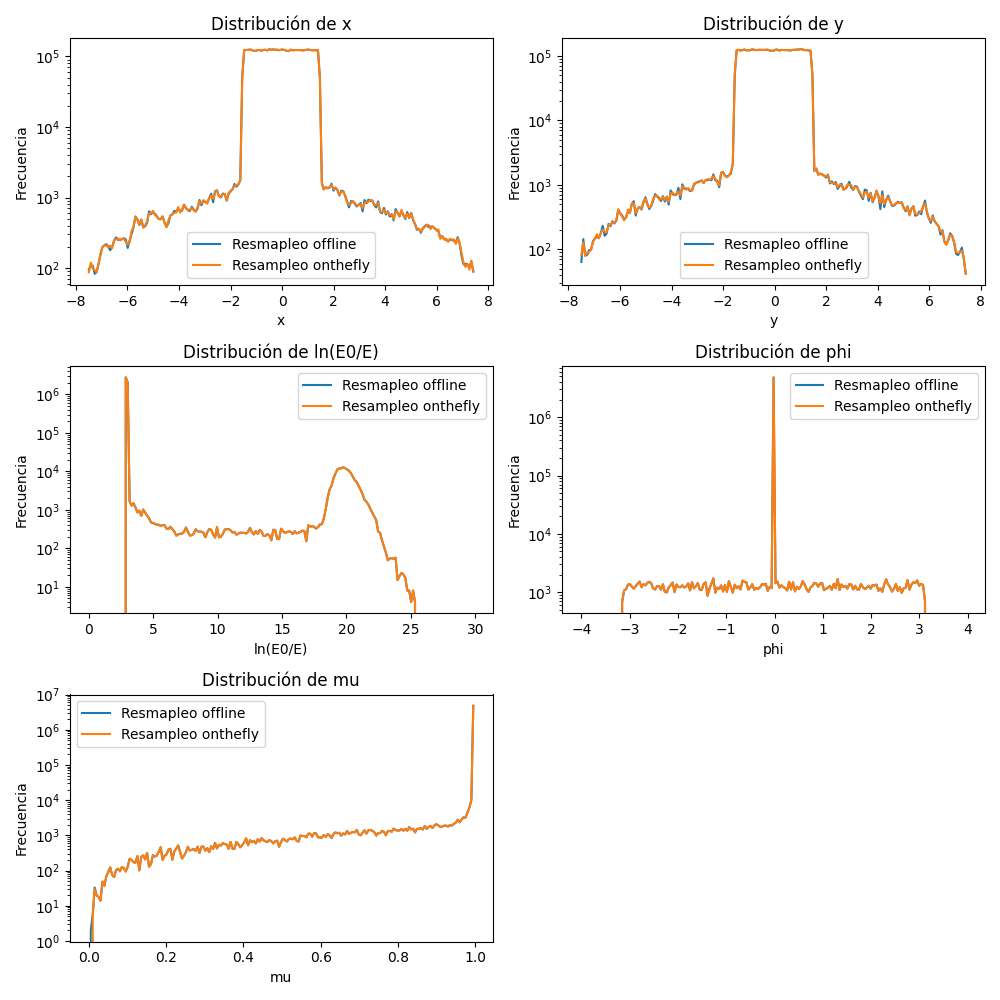

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.plot(vector_x[:-1], hist_x_original, label="Resmapleo offline")
plt.plot(vector_x[:-1], hist_x_registrado, label="Resampleo onthefly")
plt.title("Distribución de x")
plt.xlabel("x")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(vector_y[:-1], hist_y_original, label="Resmapleo offline")
plt.plot(vector_y[:-1], hist_y_registrado, label="Resampleo onthefly")
plt.title("Distribución de y")
plt.xlabel("y")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(vector_u[:-1], hist_u_original, label="Resmapleo offline")
plt.plot(vector_u[:-1], hist_u_registrado, label="Resampleo onthefly")
plt.title("Distribución de ln(E0/E)")
plt.xlabel("ln(E0/E)")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(vector_phi[:-1], hist_phi_original, label="Resmapleo offline")
plt.plot(vector_phi[:-1], hist_phi_registrado, label="Resampleo onthefly")
plt.title("Distribución de phi")
plt.xlabel("phi")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(vector_mu[:-1], hist_mu_original, label="Resmapleo offline")
plt.plot(vector_mu[:-1], hist_mu_registrado, label="Resampleo onthefly")
plt.title("Distribución de mu")
plt.xlabel("mu")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.tight_layout()
plt.savefig("distribuciones.png")
plt.show()
# plt.close()

In [7]:
import kdsource.surfsource as kds

vector_x = np.linspace(-7.5, 7.5, 200)
vector_y = np.linspace(-7.5, 7.5, 200)
vector_u = np.linspace(0, 30, 200)
vector_phi = np.linspace(-4, 4, 200)
vector_mu = np.linspace(0, 1, 200)

# ---------------------------------------------------------------------------------------------------------------------------------------

df_original = kds.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/trackfile_0.h5"
).get_pandas_dataframe()
valores_x = df_original["x"].to_numpy()
valores_y = df_original["y"].to_numpy()
valores_u = df_original["ln(E0/E)"].to_numpy()
valores_phi = df_original["phi"].to_numpy()
valores_mu = df_original["mu"].to_numpy()
valores_w = df_original["wgt"].to_numpy()
del df_original

hist_x_original = np.histogram(valores_x, bins=vector_x, weights=valores_w)[0]
hist_y_original = np.histogram(valores_y, bins=vector_y, weights=valores_w)[0]
hist_u_original = np.histogram(valores_u, bins=vector_u, weights=valores_w)[0]
hist_phi_original = np.histogram(valores_phi, bins=vector_phi, weights=valores_w)[0]
hist_mu_original = np.histogram(valores_mu, bins=vector_mu, weights=valores_w)[0]
del valores_x, valores_y, valores_u, valores_phi, valores_mu, valores_w

# ---------------------------------------------------------------------------------------------------------------------------------------

df_registrado = kds.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl.gz"
).get_pandas_dataframe()
valores_x = df_registrado["x"].to_numpy()
valores_y = df_registrado["y"].to_numpy()
valores_u = df_registrado["ln(E0/E)"].to_numpy()
valores_phi = df_registrado["phi"].to_numpy()
valores_mu = df_registrado["mu"].to_numpy()
valores_w = df_registrado["wgt"].to_numpy()
del df_registrado

hist_x_registrado = np.histogram(valores_x, bins=vector_x, weights=valores_w)[0]
hist_y_registrado = np.histogram(valores_y, bins=vector_y, weights=valores_w)[0]
hist_u_registrado = np.histogram(valores_u, bins=vector_u, weights=valores_w)[0]
hist_phi_registrado = np.histogram(valores_phi, bins=vector_phi, weights=valores_w)[0]
hist_mu_registrado = np.histogram(valores_mu, bins=vector_mu, weights=valores_w)[0]
del valores_x, valores_y, valores_u, valores_phi, valores_mu, valores_w

Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/trackfile_0.h5: 2677552
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/verificacion_onthefly/mcpl_test.mcpl.gz: 5000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


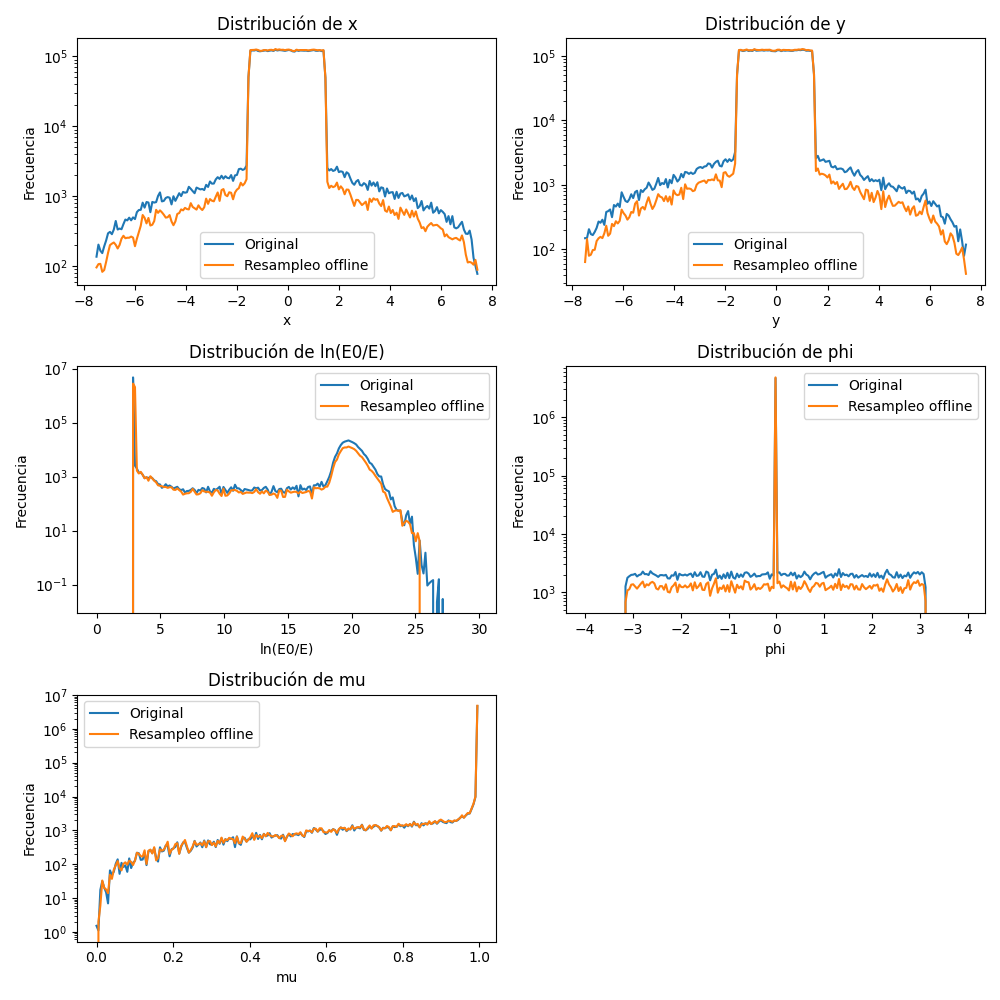

In [8]:
plt.figure(figsize=(10, 10))

factor = 70/2/1.5

plt.subplot(3, 2, 1)
plt.plot(vector_x[:-1], hist_x_original * factor, label="Original")
plt.plot(vector_x[:-1], hist_x_registrado, label="Resampleo offline")
plt.title("Distribución de x")
plt.xlabel("x")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(vector_y[:-1], hist_y_original * factor, label="Original")
plt.plot(vector_y[:-1], hist_y_registrado, label="Resampleo offline")
plt.title("Distribución de y")
plt.xlabel("y")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(vector_u[:-1], hist_u_original * factor, label="Original")
plt.plot(vector_u[:-1], hist_u_registrado, label="Resampleo offline")
plt.title("Distribución de ln(E0/E)")
plt.xlabel("ln(E0/E)")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(vector_phi[:-1], hist_phi_original * factor, label="Original")
plt.plot(vector_phi[:-1], hist_phi_registrado, label="Resampleo offline")
plt.title("Distribución de phi")
plt.xlabel("phi")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(vector_mu[:-1], hist_mu_original * factor, label="Original")
plt.plot(vector_mu[:-1], hist_mu_registrado, label="Resampleo offline")
plt.title("Distribución de mu")
plt.xlabel("mu")
plt.ylabel("Frecuencia")
plt.yscale("log")
plt.legend()

plt.tight_layout()
plt.savefig("distribuciones.png")
plt.show()
# plt.close()